In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [3]:
import os
#os.getcwd()
os.chdir('/home/bfrison/pet_finder')

In [5]:
df = pd.read_csv('train.csv', dtype={'AdoptionSpeed':'O'})
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [5]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000


In [6]:
print(df['AdoptionSpeed'].describe())


count     14993
unique        5
top           4
freq       4197
Name: AdoptionSpeed, dtype: object


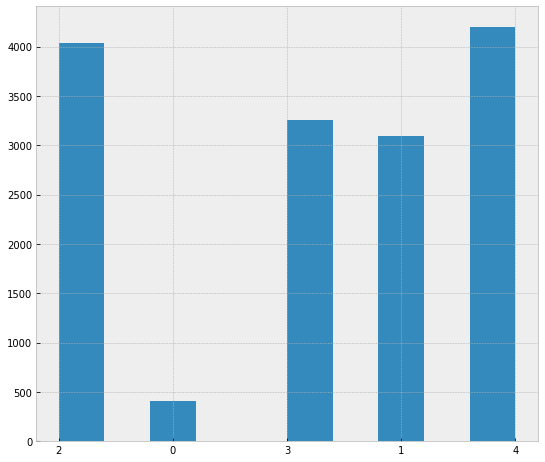

In [7]:
plt.figure(figsize=(9, 8))
# df['AdoptionSpeed'].hist(bins=5)
df['AdoptionSpeed'].hist()

In [8]:
df.dtypes
# list(set(df.dtypes.tolist()))

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed     object
dtype: object

In [7]:
df_dogs = df[df['Type'] == 1]
df_cats = df[df['Type'] == 2]
df_adopt0 = df[df['AdoptionSpeed'] == '0']
df_adopt1 = df[df['AdoptionSpeed'] == '1']
df_adopt2 = df[df['AdoptionSpeed'] == '2']
df_adopt3 = df[df['AdoptionSpeed'] == '3']
df_adopt4 = df[df['AdoptionSpeed'] == '4']
df_dogs0 = df_dogs[df_dogs['AdoptionSpeed'] == '0']
df_dogs1 = df_dogs[df_dogs['AdoptionSpeed'] == '1']
df_dogs2 = df_dogs[df_dogs['AdoptionSpeed'] == '2']
df_dogs3 = df_dogs[df_dogs['AdoptionSpeed'] == '3']
df_dogs4 = df_dogs[df_dogs['AdoptionSpeed'] == '4']
df_dogs_adopt = [df_dogs0, df_dogs1, df_dogs2, df_dogs3, df_dogs4]
df_cats0 = df_cats[df_cats['AdoptionSpeed'] == '0']
df_cats1 = df_cats[df_cats['AdoptionSpeed'] == '1']
df_cats2 = df_cats[df_cats['AdoptionSpeed'] == '2']
df_cats3 = df_cats[df_cats['AdoptionSpeed'] == '3']
df_cats4 = df_cats[df_cats['AdoptionSpeed'] == '4']
df_cats_adopt = [df_cats0, df_cats1, df_cats2, df_cats3, df_cats4]

[None, Text(0.5, 1.0, 'Cats')]

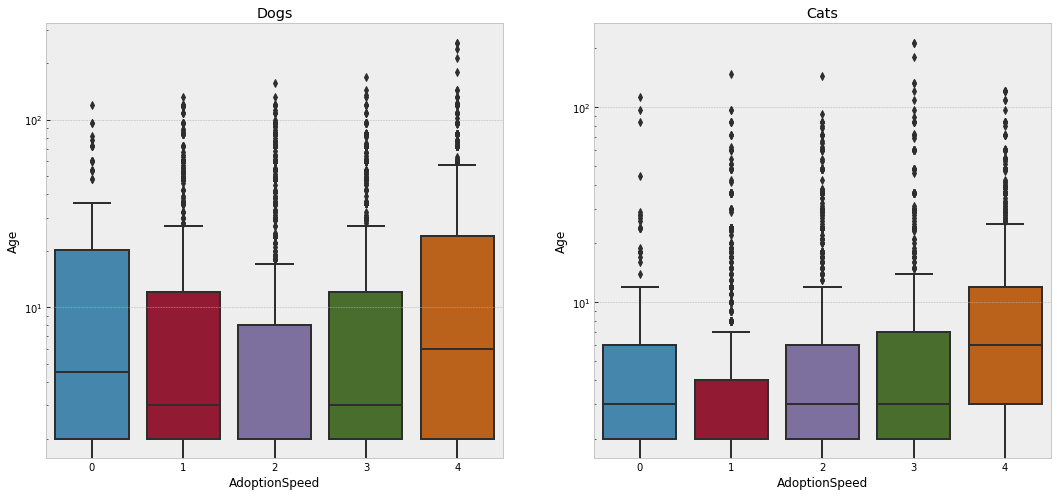

In [10]:
fig, ax_lst = plt.subplots(1, 2, figsize=(18,8))
ax1 = sns.boxplot(x='AdoptionSpeed', y='Age', ax=ax_lst[0], data=df_dogs)    
ax2 = sns.boxplot(x='AdoptionSpeed', y='Age', ax=ax_lst[1], data=df_cats)    
ax1.set(yscale='log', title='Dogs')    
ax2.set(yscale='log', title='Cats')

[None, Text(0.5, 1.0, 'Cats')]

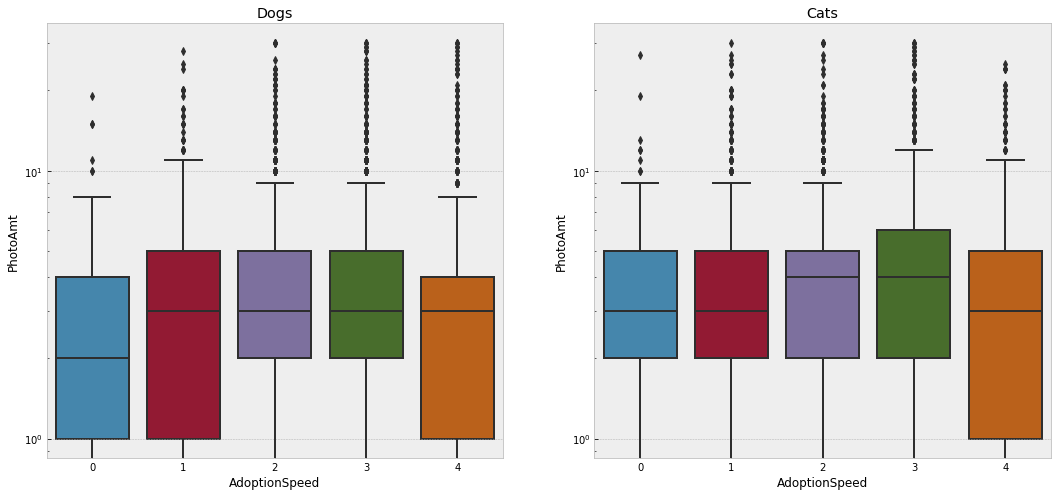

In [11]:
fig2, ax_lst2 = plt.subplots(1, 2, figsize=(18,8))
ax3 = sns.boxplot(x='AdoptionSpeed', y='PhotoAmt', ax=ax_lst2[0], data=df_dogs)
ax4 = sns.boxplot(x='AdoptionSpeed', y='PhotoAmt', ax=ax_lst2[1], data=df_cats)
ax3.set(yscale='log', title='Dogs')    
ax4.set(yscale='log', title='Cats')

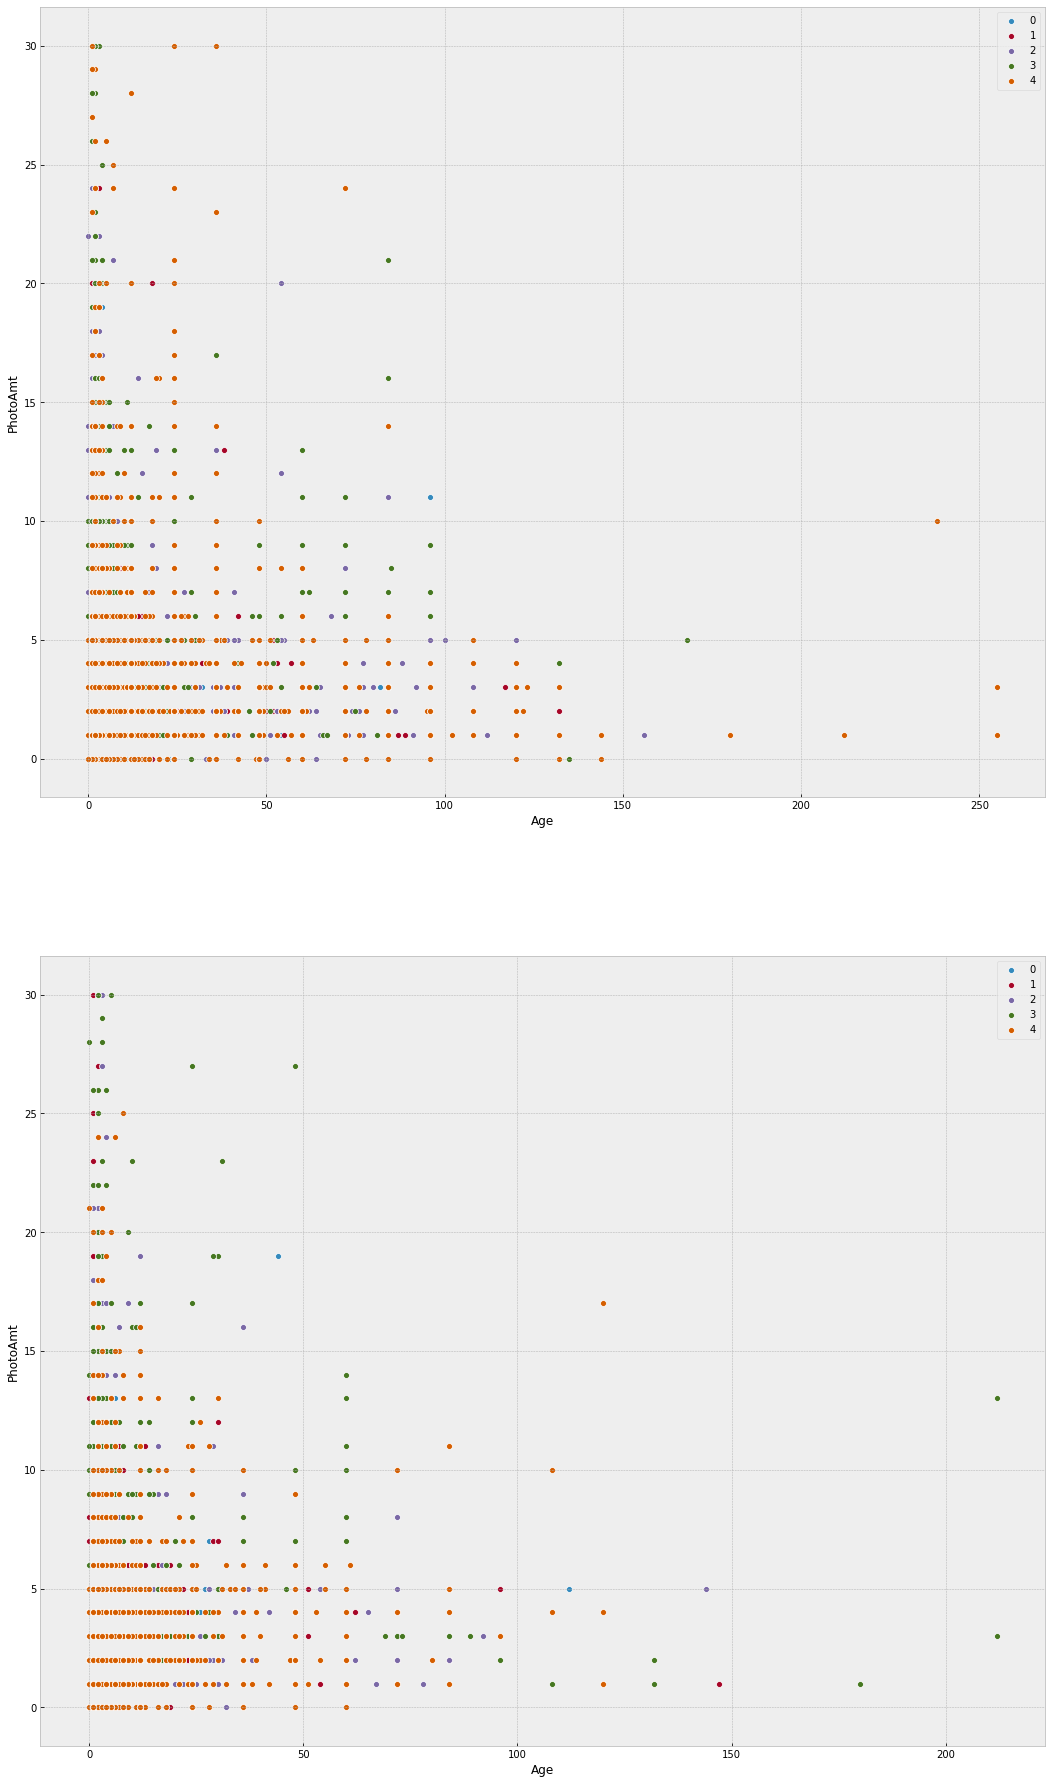

In [10]:
fig3, ax_list3 = plt.subplots(2, 1, figsize=(18,32))
for speed, df_adopt in enumerate(df_dogs_adopt):
    sns.scatterplot(x='Age', y='PhotoAmt', data=df_adopt, label=speed, ax=ax_list3[0])
for speed, df_adopt in enumerate(df_cats_adopt):
    sns.scatterplot(x='Age', y='PhotoAmt', data=df_adopt, label=speed, ax=ax_list3[1])

In [13]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0


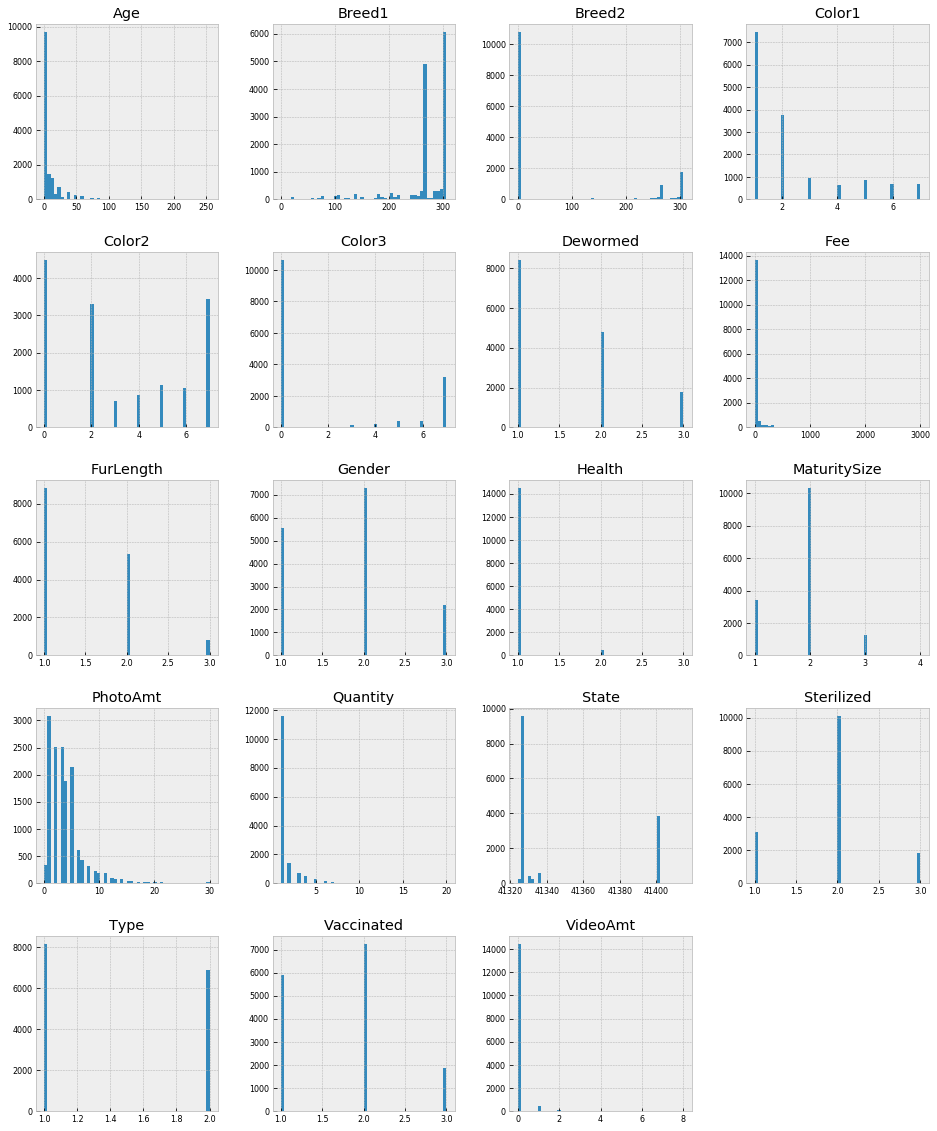

In [14]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations